In [18]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from numpy.fft import fft

In [29]:
x, fm = sf.read('luzbel44.wav')
if(x.ndim == 1):
    print("El archivo de audio es mono \U0001F412 \U0001F44D")

El archivo de audio es mono 🐒 👍


In [28]:
fm              # freqüència de mostratge

44100

In [20]:
L = len(x)
L               # nombre de mostres


95091

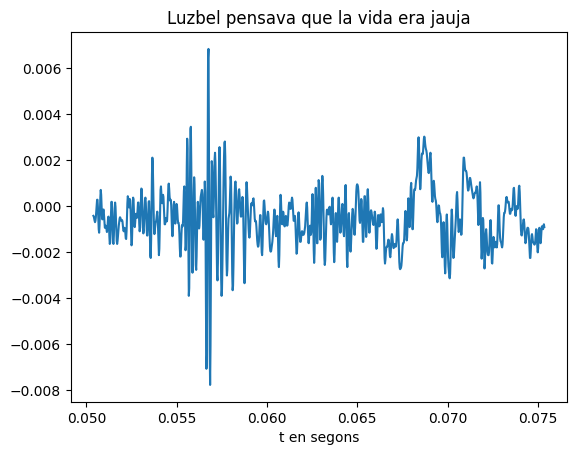

In [24]:
Tm = 1 / fm
Ls = int(fm * 25e-3)                     
t = Tm * np.arange(L)                    

plt.figure(0)                             
plt.plot(t[2222:2222+Ls], x[2222:2222+Ls])              
plt.xlabel('t en segons')                 
plt.title('Luzbel pensava que la vida era jauja')   
plt.show() 

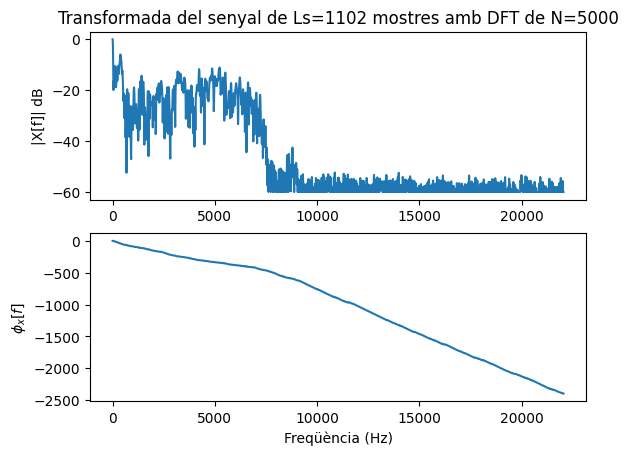

In [30]:
N = 5000
X = fft(x[2222:2222+Ls], N)               # Càlcul de la transformada de 5 períodes de la sinusoide
X_half = X[0:N//2]               
k = np.arange(N/2)                    # Vector amb els valors 0≤  k<N/2
freq_axis = k * (fm / N)
epsilon = 1e-20                       # Aquest petit valor evitarà la operació log(0) per a coefficients de valor 0
dBs = 20 * np.log10(abs(X_half+epsilon) / max(abs(X_half+epsilon)))
dB_min = -60
dBs = np.maximum(dBs, dB_min)

plt.figure(1)                         
plt.subplot(211)                      
plt.plot(freq_axis, dBs)              
plt.title(f'Transformada del senyal de Ls={Ls} mostres amb DFT de N={N}')   
plt.ylabel('|X[f]| dB')                  
plt.subplot(212)                      
plt.plot(freq_axis,np.unwrap(np.angle(X_half)))    
plt.xlabel('Freqüència (Hz)')                 
plt.ylabel('$\phi_x[f]$')             
plt.show()